# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

**Описание проекта:**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

**Данные:**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Описание данных:**

Структура **visits_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура **orders_info_short.csv:**

- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура **costs_info_short.csv:**
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**Задачи:**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

In [1]:
# блок загрузки необходимых библиотек

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# подгружаем данные и сохраняем их в переменные
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # визиты
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # расходы
)

In [3]:
# выводим данные на экран

display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
# rename columns

data = [visits, orders, costs]
for name in data:
    name.columns = name.columns.str.lower()
    name.columns = name.columns.str.replace(' ', '_')

In [5]:
# check

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [6]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [7]:
# check duplicated
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [8]:
# check Nan
print(visits.isna().sum())
print()
print(orders.isna().sum())
print()
print(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


In [9]:
# check Dtype
print(visits.info())
print()
print(orders.info())
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

In [10]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [11]:
visits.device.value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [12]:
visits.channel.value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [13]:
costs.channel.value_counts()

OppleCreativeMedia    180
RocketSuperAds        180
MediaTornado          180
TipTop                180
WahooNetBanner        180
YRabbit               180
LeapBob               180
lambdaMediaAds        180
FaceBoom              180
AdNonSense            180
Name: channel, dtype: int64

Выводы по предобработке:

Исходя их проделанной работы по предобработке, можно сделать вывод о качестве исходных данных. Качество данных хорошее, пропусков нет, дубликатов нет, типы данных в порядке. Изменение столбцов и перевод типов временных дат нужны для целей дальнейшего анализа.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    #profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.**

In [22]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
# Определяем минимальную и максимальную даты привлечения пользователей
min_date = profiles.first_ts.min()
max_date = profiles.first_ts.max()

print(min_date)
print(max_date)

2019-05-01 00:00:41
2019-10-27 23:59:04


Профили составлены верно.Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.Минимальная и максимальная дата привлечения пользователей совпадает с теми что были указаны в описании проекта.

**Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

In [24]:
# Колличество всех пользователей, по регионам
profiles.pivot_table(index = 'region', 
                     columns = 'payer', 
                     values = 'user_id', 
                     aggfunc = 'nunique', 
                     margins = True)\
        .sort_values('All', ascending=False)

payer,False,True,All
region,,,
All,141127,8881,150008
United States,93100,6902,100002
UK,16875,700,17575
France,16787,663,17450
Germany,14365,616,14981


In [25]:
# Доля покупателей по регионам
profiles.groupby('region').agg({'payer':'mean'}).sort_values('payer', ascending=False).style.format("{:,.2%}")

,payer
region,
United States,6.90%
Germany,4.11%
UK,3.98%
France,3.80%


Вывод:
- Из региона USA больше всего пользователей, которые приходят в приложение.
- Самая большая доля покупателей так же из USA

**Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

In [26]:
# Колличество всех пользователей, по устройствам
profiles.pivot_table(index = 'device', 
                     columns = 'payer', 
                     values = 'user_id', 
                     aggfunc = 'nunique', 
                     margins = True)\
        .sort_values('All', ascending=False)

payer,False,True,All
device,,,
All,141127,8881,150008
iPhone,51097,3382,54479
Android,32982,2050,35032
PC,28918,1537,30455
Mac,28130,1912,30042


In [27]:
# Доля покупателей по устройствам
profiles.groupby('device').agg({'payer':'mean'}).sort_values('payer', ascending=False).style.format("{:,.2%}")

,payer
device,
Mac,6.36%
iPhone,6.21%
Android,5.85%
PC,5.05%


Вывод:
- Больше всего пользователей имеют устройство iPhone
- Самую большую долю покупателей имеет устройство Mac

**Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [28]:
# Колличество всех пользователей, по каналам привлечения

profiles.pivot_table(index = 'channel', 
                     columns = 'payer', 
                     values = 'user_id', 
                     aggfunc = 'nunique', 
                     margins = True)\
        .sort_values('All', ascending=False)

payer,False,True,All
channel,,,
All,141127,8881,150008
organic,55279,1160,56439
FaceBoom,25587,3557,29144
TipTop,17683,1878,19561
OppleCreativeMedia,8372,233,8605
LeapBob,8291,262,8553
WahooNetBanner,8100,453,8553
RocketSuperAds,4096,352,4448
MediaTornado,4208,156,4364


In [29]:
# Доля покупателей по каналам привличения
profiles.groupby('channel').agg({'payer':'mean'}).sort_values('payer', ascending=False).style.format("{:,.2%}")

,payer
channel,
FaceBoom,12.20%
AdNonSense,11.34%
lambdaMediaAds,10.47%
TipTop,9.60%
RocketSuperAds,7.91%
WahooNetBanner,5.30%
YRabbit,3.83%
MediaTornado,3.57%
LeapBob,3.06%


**Итого:**

Регионы:
- Из региона USA больше всего пользователей, которые приходят в приложение.
- Самая большая доля покупателей так же из региона USA

Устройства:
- Больше всего пользователей имеют устройство iPhone
- Самую большую долю покупателей имеет устройство Mac

Каналы привличения:
- Больше всего пользователей пришло по каналу привлечения organic
- Самая большая доля покупателей привлечена каналом FaceBoom, а самая наименьшая доля у канала - organic.

### Маркетинг

**Посчитайте общую сумму расходов на маркетинг.**

In [30]:
print('Общая сумма расходов на маркетинг составляет', profiles.acquisition_cost.sum())

Общая сумма расходов на маркетинг составляет 105497.29999999999


**Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.**

In [31]:
# распределение трат по рекламным источникам
cac_channel = (
profiles.groupby('channel')
        .agg({'acquisition_cost':'sum'})
        .rename(columns={'acquisition_cost': 'cac'})
        .sort_values('cac', ascending=False)
)
cac_channel

,cac
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


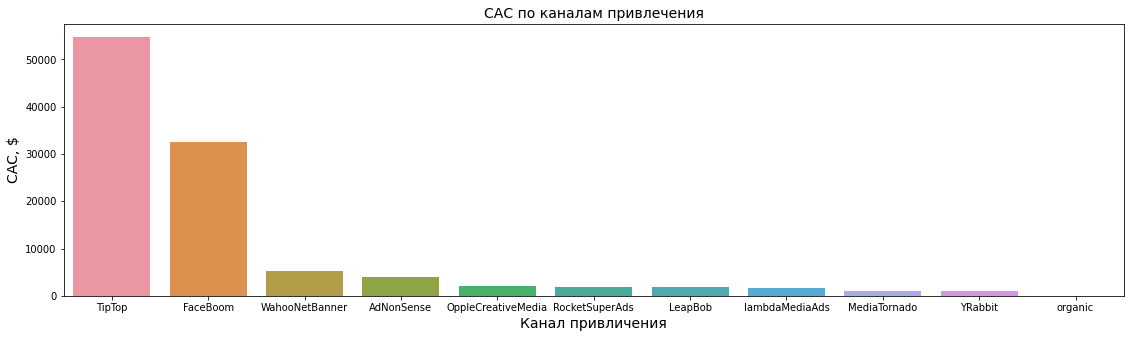

In [32]:
# отразим данные на графике

plt.figure(figsize=(19, 5))
sns.barplot(data=cac_channel,x=cac_channel.index, y= cac_channel['cac']);
plt.ylabel('CAC, $', fontsize=14)
plt.xlabel('Канал привличения', fontsize=14)
plt.title('САС по каналам привлечения', fontsize=14);

Больше всего рекламных расходов приходится на такие источники как TipTop (54751.30 долларов) и FaceBoom (32445.60 долларов), что в свою очередь составляет около 80% от общей суммы всех расходов на рекламу.

**Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.**

In [33]:
# добавим столбец недели в профиль пользователя
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40


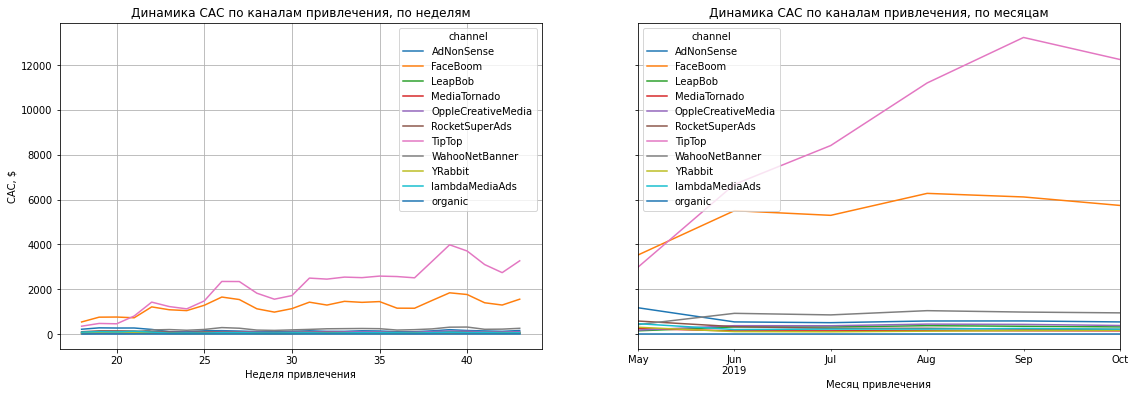

In [34]:
# строим графики

plt.figure(figsize=(19, 6))


ax1 = plt.subplot(1, 2, 1)
profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.ylabel('CAC, $')
plt.xlabel('Неделя привлечения')
plt.title('Динамика САС по каналам привлечения, по неделям');

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.ylabel('CAC, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика САС по каналам привлечения, по месяцам');



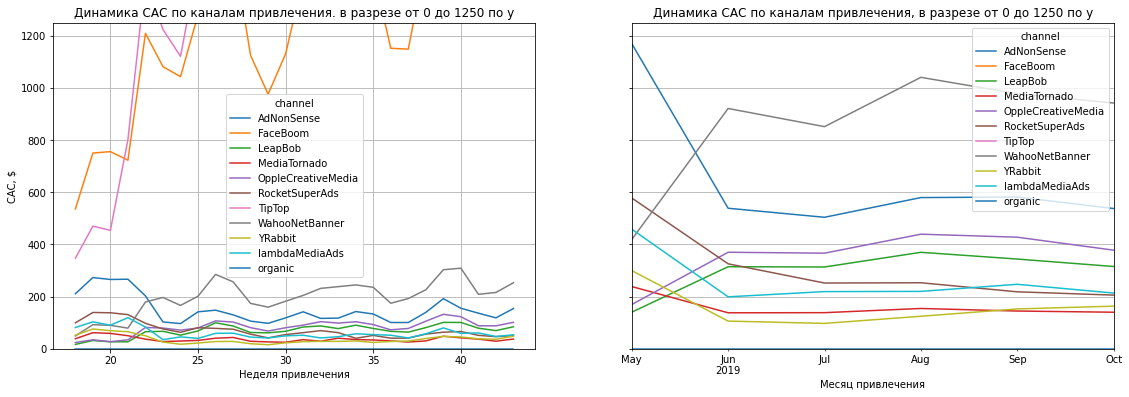

In [35]:
# Динамика в разрезе от 0 до 1250 по у 

plt.figure(figsize=(19, 6))


ax1 = plt.subplot(1, 2, 1)
profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.ylim(0, 1250)
plt.ylabel('CAC, $')
plt.xlabel('Неделя привлечения')
plt.title('Динамика САС по каналам привлечения. в разрезе от 0 до 1250 по у');

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.ylim(0, 1250)
plt.ylabel('CAC, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика САС по каналам привлечения, в разрезе от 0 до 1250 по у');

- Есть 2 канала привличения у которых заметна сильная изменчивость динамики изменения расходов во времени (по неделям и месяцам) это TipTop и  FaceBoom

**Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.**

In [36]:
# считаем средний CAC по каналам привлечения

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values('cac', ascending=False)
)

cac

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


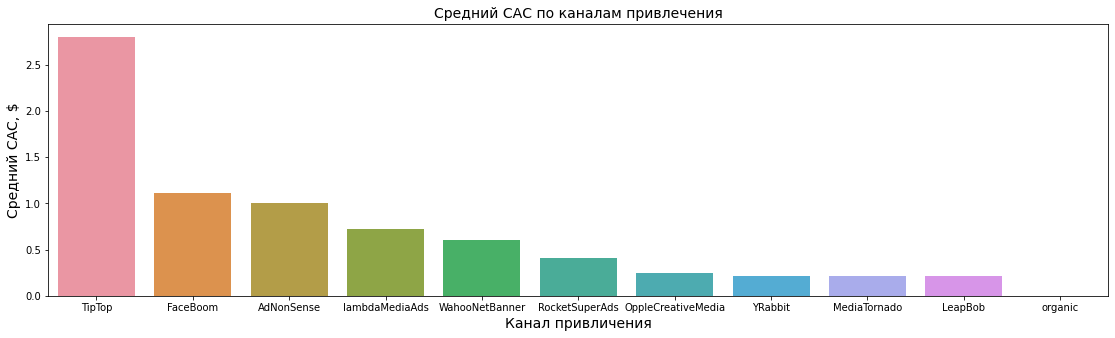

In [37]:
# отразим данные на графике

plt.figure(figsize=(19, 5))
sns.barplot(data=cac,x=cac.index, y= cac['cac']);
plt.ylabel('Cредний CAC, $', fontsize=14)
plt.xlabel('Канал привличения', fontsize=14)
plt.title('Cредний САС по каналам привлечения', fontsize=14);

Самый дорогой  средний Cac по каналу привлечения пользователей у TipTop

**Итого:**
- Общая сумма расходов на маркетинг составляет 105497.29 долларов.
- Больше всего рекламных расходов приходится на такие источники как TipTop (54751.30 долларов) и FaceBoom (32445.60 долларов), что в свою очередь составляет около 80% от общей суммы расходов на маркетинг.
- Есть 2 канала привличения у которых заметна сильная изменчивость динамики изменения расходов во времени (по неделям и месяцам) это TipTop и  FaceBoom
- Самый дорогой средний Cac по каналу привлечения пользователей у TipTop

### Оцените окупаемость рекламы

In [38]:
# Установим момент и горизонт анализа данных.

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [39]:
# Исключаем органических пользователей из анализа окупаемости рекламной кампании, 
# поскольку средства на них не были потрачены, а нам нужно изучить окупаемость рекламы.

profiles = profiles.query('channel != "organic"')

**Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.**

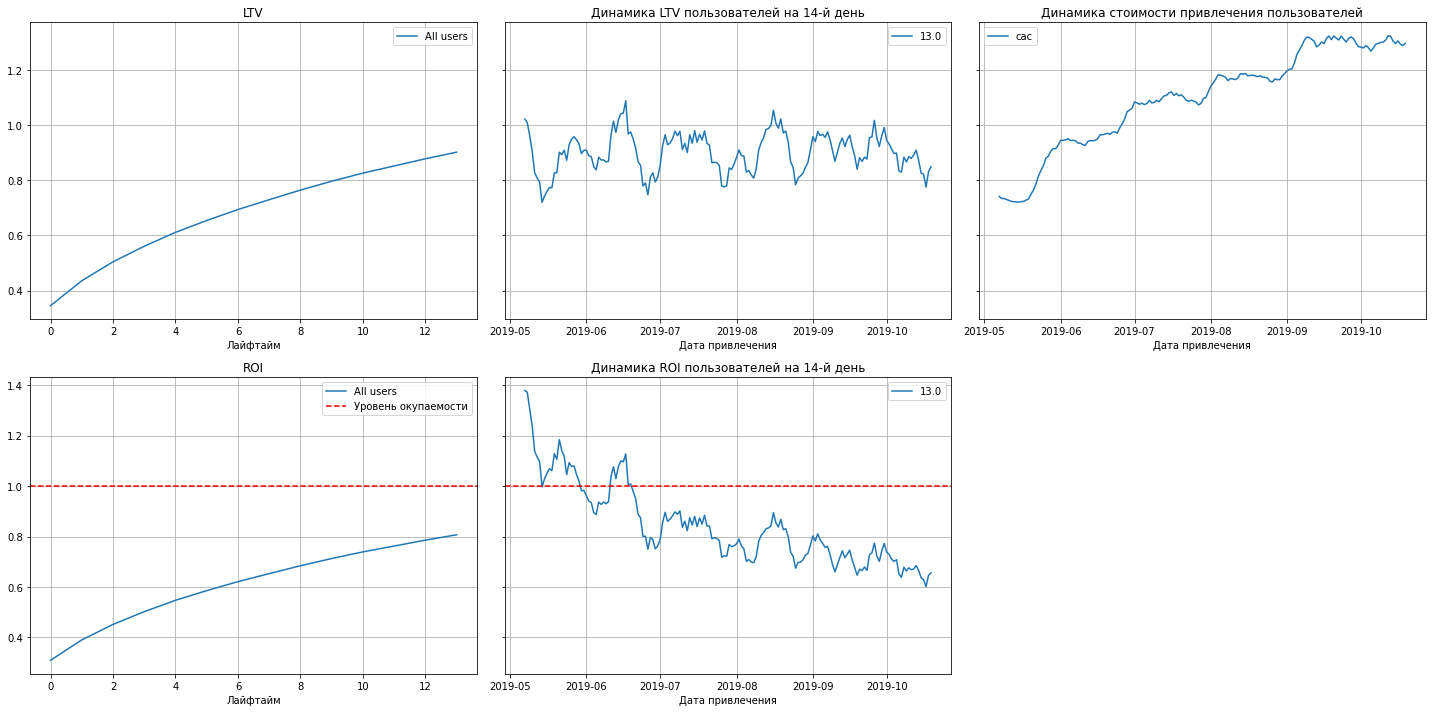

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Окупаемость рекламы**
- ROI  не достиг уровня окупаемости. Рекламная компания убыточная. ROI к 14 дню составил 80%. на каждый 1 доллар рекламных затрат возвращается только 0,8.
- По динамике ROI наблюдается спад от 1.4 до 0.6. К концу исследуемого периода компания потеряла около 80 % ROI
- Динамика CAC растет. САС вырос с 0,8 до 1.3 (Рост - хуже, падение - лучше)
- LTV  достаточно стабилен. держится в диапазоне от 0.8 до 0.1. Качество пользователей хорошее.

**Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.**

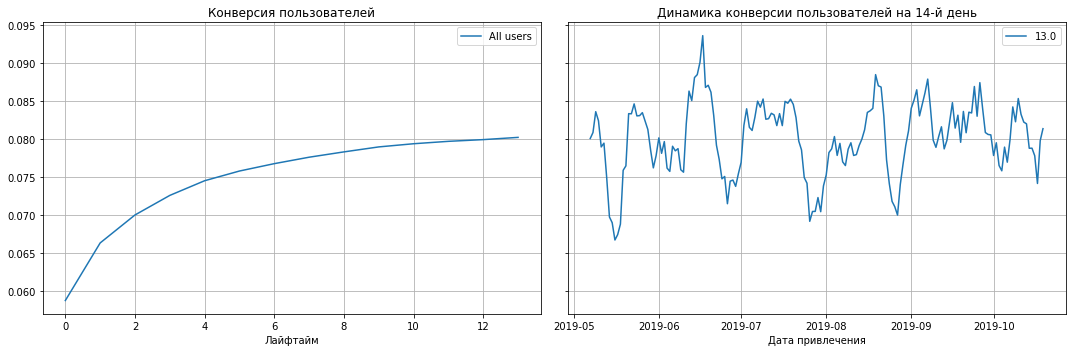

In [41]:
# считаем и строим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Конверсия**
- Общая конверсия пользователей нормальная, просадок не наблюдается.
- В мае был заметен спад динамики конверсии 14го дня. в остальном динамика довольно стабильная и держится около 0,08.

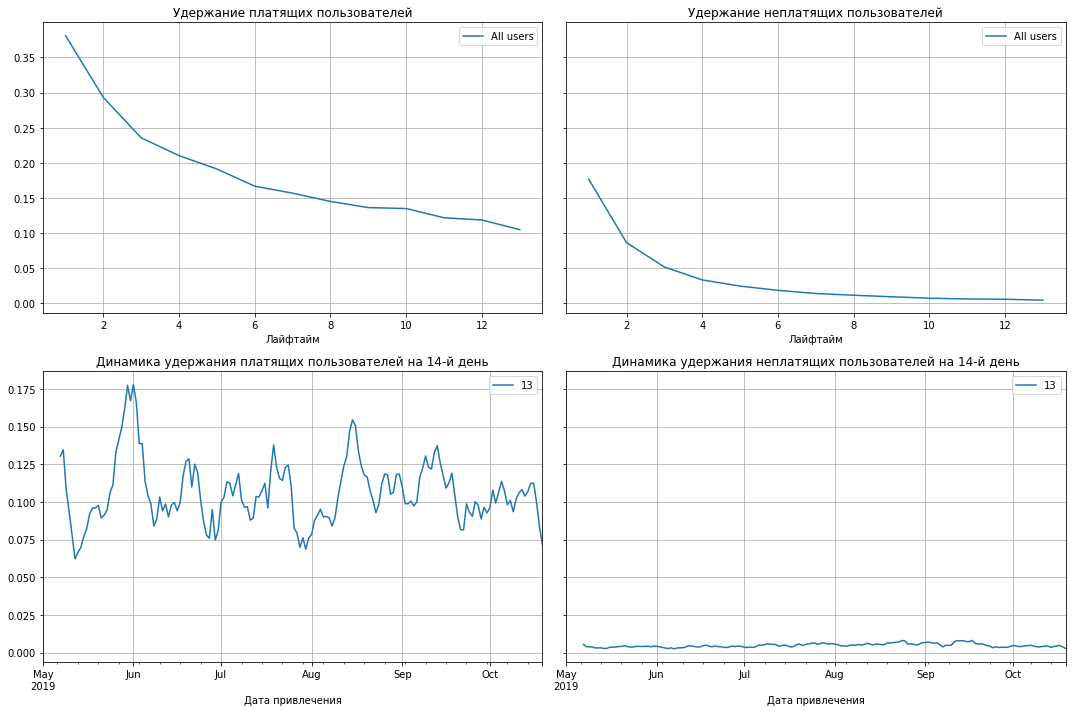

In [42]:
# считаем и строим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days )

plot_retention(retention_grouped, retention_history, horizon_days) 

**Общее Удержание** 
- Удержание неплатящих пользователей низходящее и стремится к нулю к 14 лайфтайму.
- Динамика удержания неплатящих пользователей 14 лайфтайма  варьируется около нуля. Такие показатели для неплатящих пользователей - нормальны
- Удержание платящих пользователей имеет нисходящий тренд и к 14 дню составляет около 0,1. 
- Динкамика удержания платящих пользователей на 14й день относительно стабильна и варьируется около 0,1 но к концу октября 2019г имеет просаду до 0,075

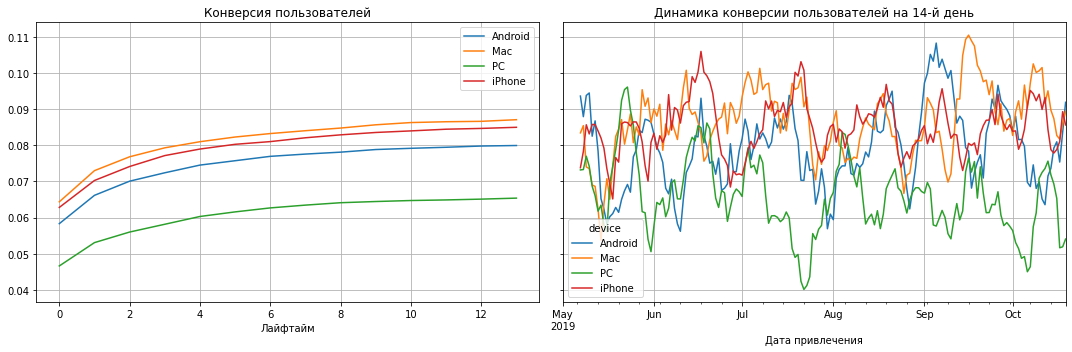

In [43]:
# Конверсия по девайсам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

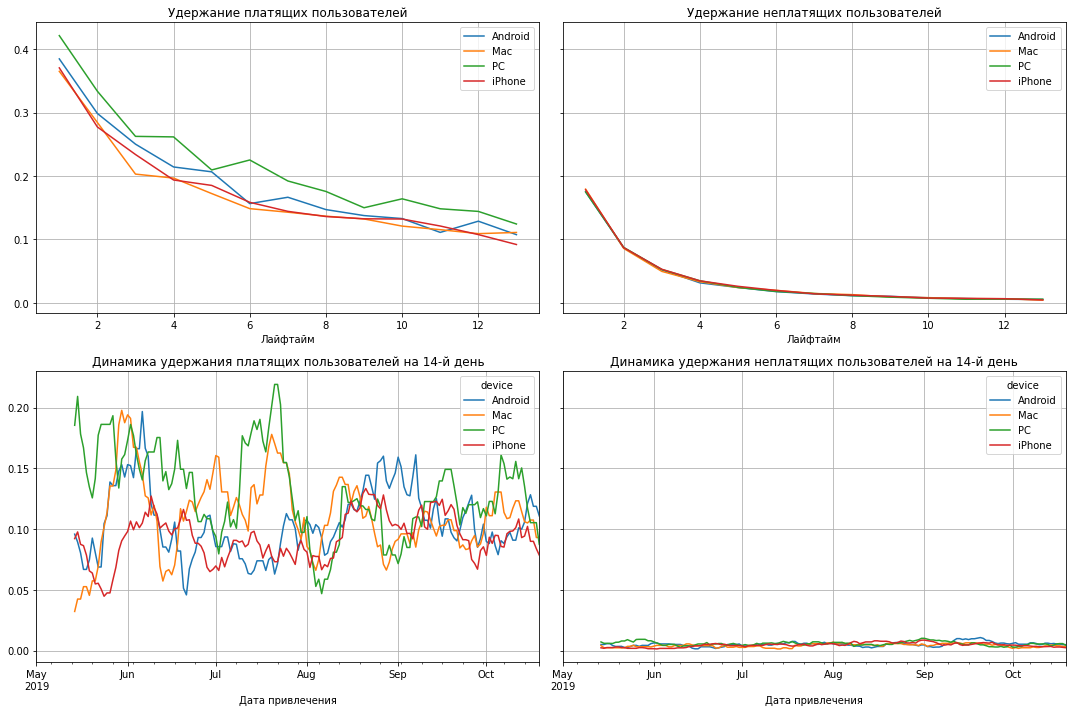

In [44]:
# Удержание по девайсам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window = 14) 

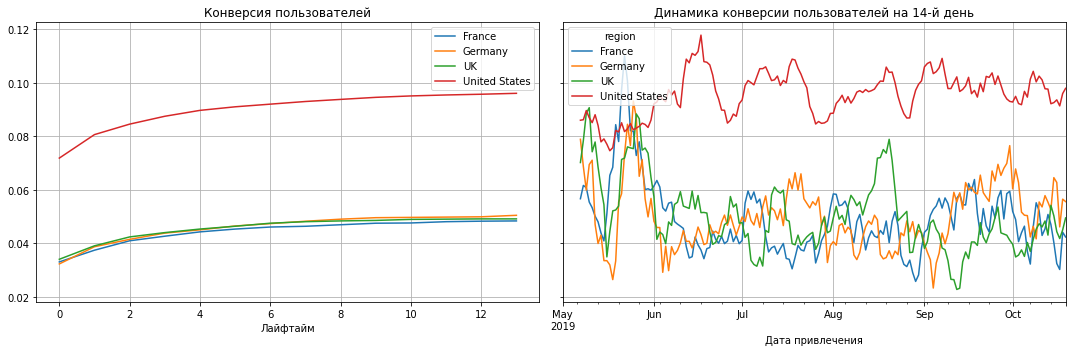

In [45]:
# Конверсия по регионам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

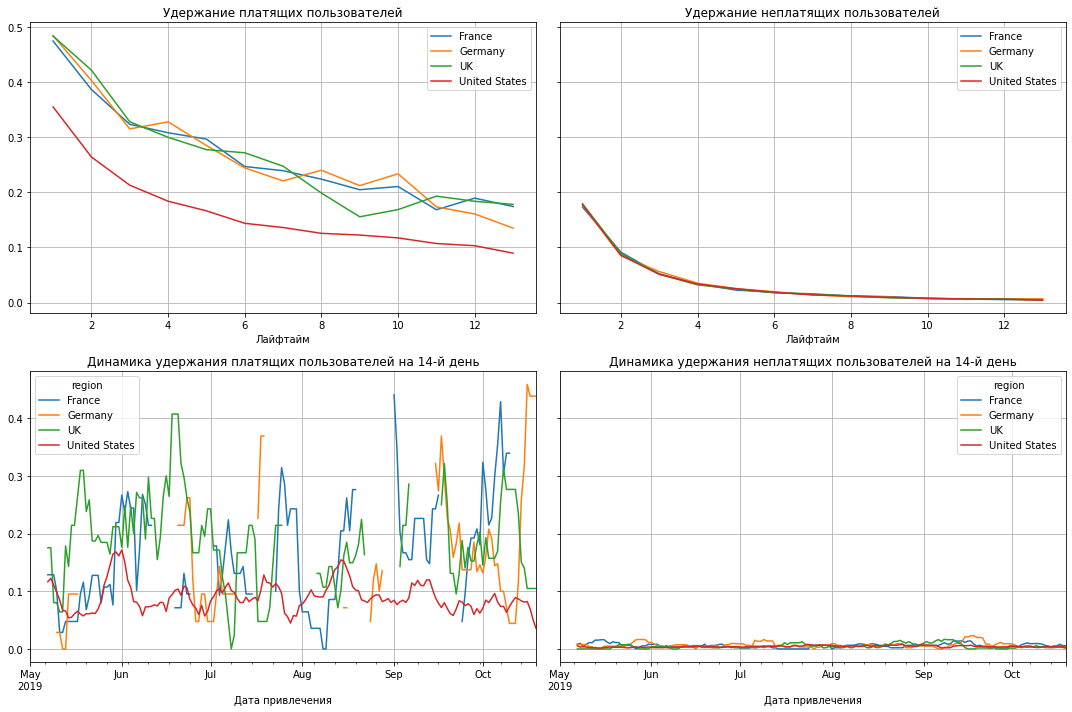

In [46]:
# Удержание по регионам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

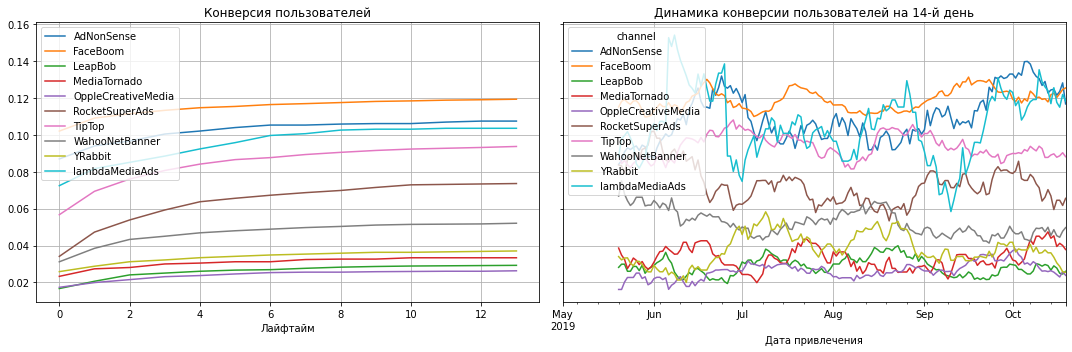

In [47]:
# Конверсия по каналам привличения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 20) 

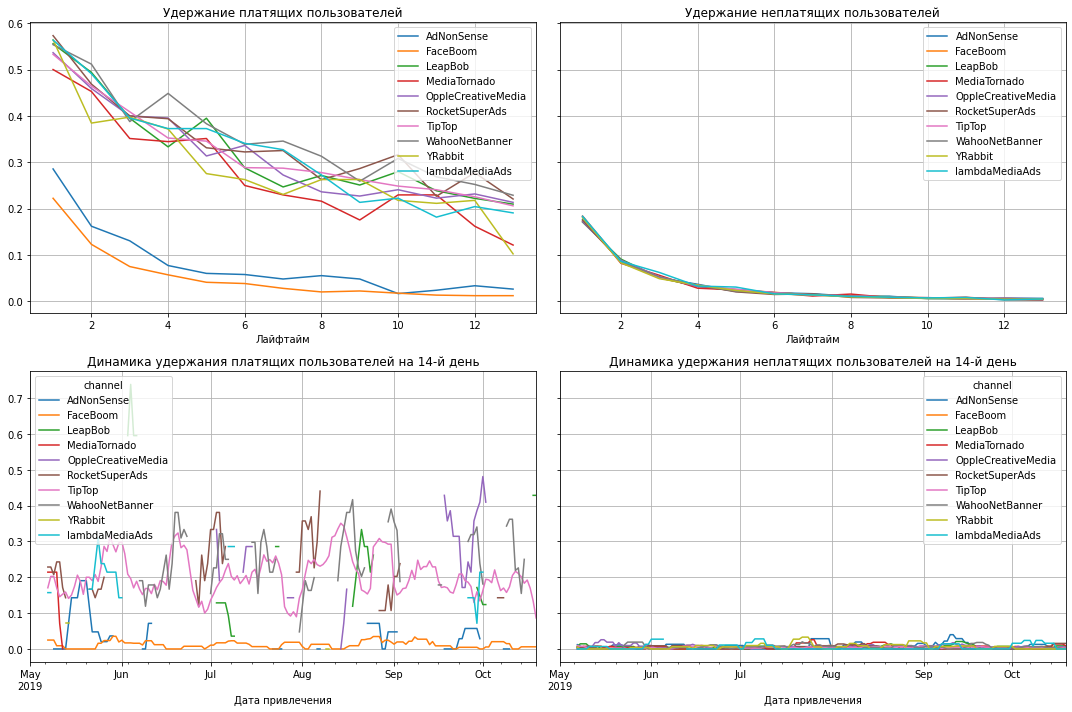

In [48]:
# Удержание по каналам привличения
 
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы по Удержанию и Конверсии в срезах по Регионам, Устройствам и Каналам привличения**

Конверсия:
- Конверсия у **PC** чуть хуже остальных, Динамика конверсии у всех в норме
- Конверсия у **USA** значительно лучше остальных регионов, Динамика конверсии соответственно тоже

Удержание:
- Удержание платящих пользователей у **USA** хуже остальных регионов
- Очень низкое удержание платящих пользователей у каналов привличения - **AdNonSense** и **Faceboom**

**Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

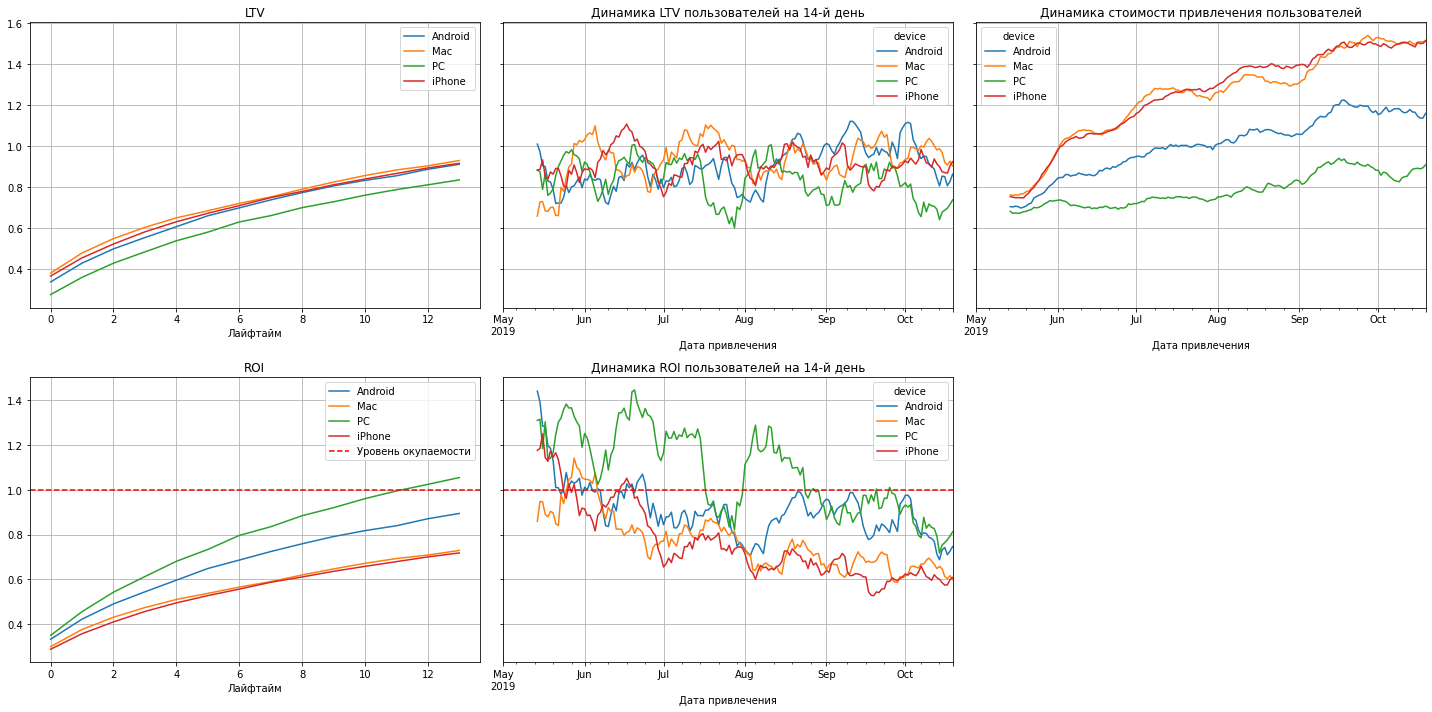

In [49]:
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Окупаемость рекламы с разбивкой по устройствам**
- LTV всех устройств схожий, чуть хуже этот показатель у **PC**, Динамика LTV стабильная.
- Динамика САС возрастающая. САС дешевле у **PC**, дороже у **MAC** и **iphone**
- Уровня окупаемости достиг только ROI у **PC**, **Android**, **MAC** и **iphone** нет
- Динамика ROI имеет убывающую тенденцию. До июня 2019г. все устройства окупались, дальше что то пошло не так. К октябрю ROI по всем устройствам упал ниже уровня окупаемости и составлял от 0,6 до 0,8. 


**Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

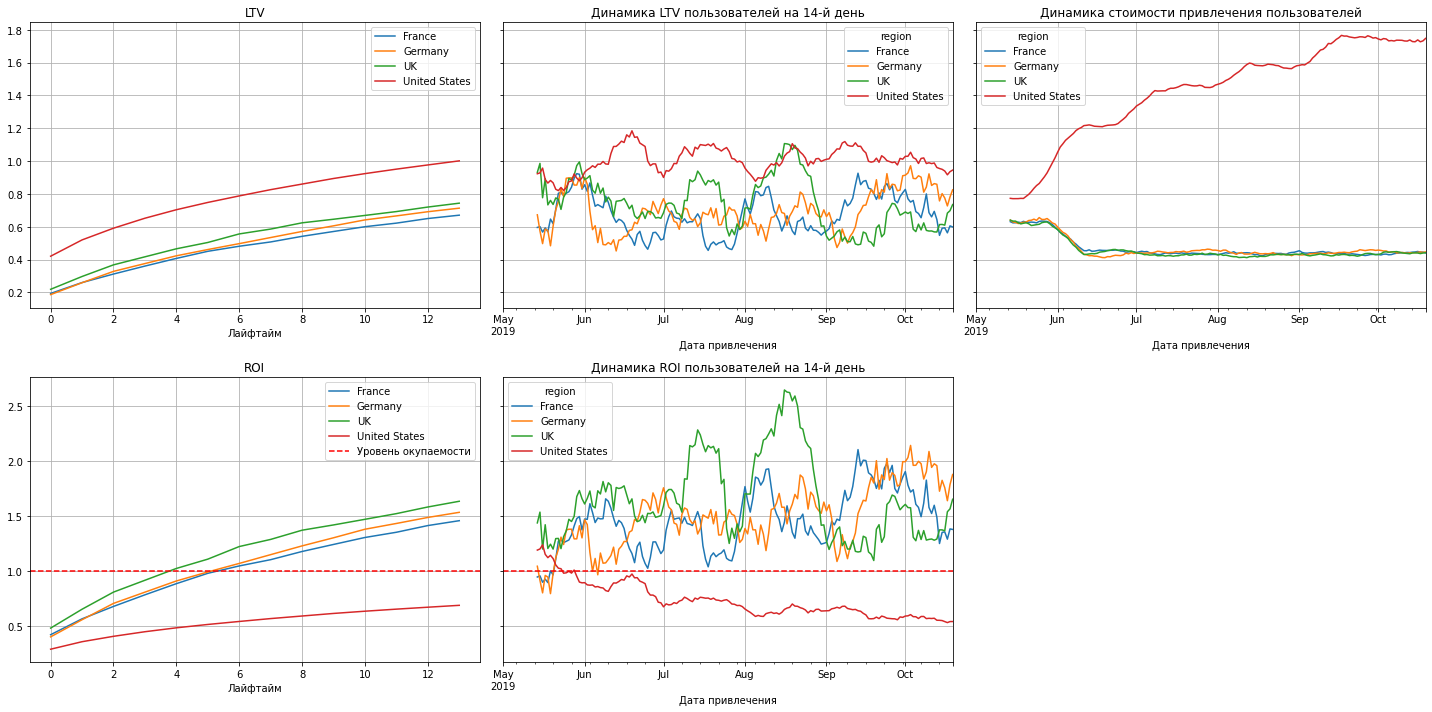

In [50]:
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Окупаемость рекламы с разбивкой по странам.**
- LTV **USA** чуть выше чем у всех остальных. 1 против 0,7-0,8 у остальных
- Динамика LTV **USA** чуть лучше относительно остальныъ регионов.
- Динамика САС **USA** стремительно выросла вверх начиная с июня перейдя черту в 1,0 в то время как САС остальных регионов весь временной отрезок находится около значений 0,4
- Раз вырос САС **USA**, следовательно и упал ROI **USA**. ROI этого региона не достиг уровня окупаемости, и имеет тенденцию убывания. Динамика ROI остальных регионов выше уровня окупаемости.

**Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

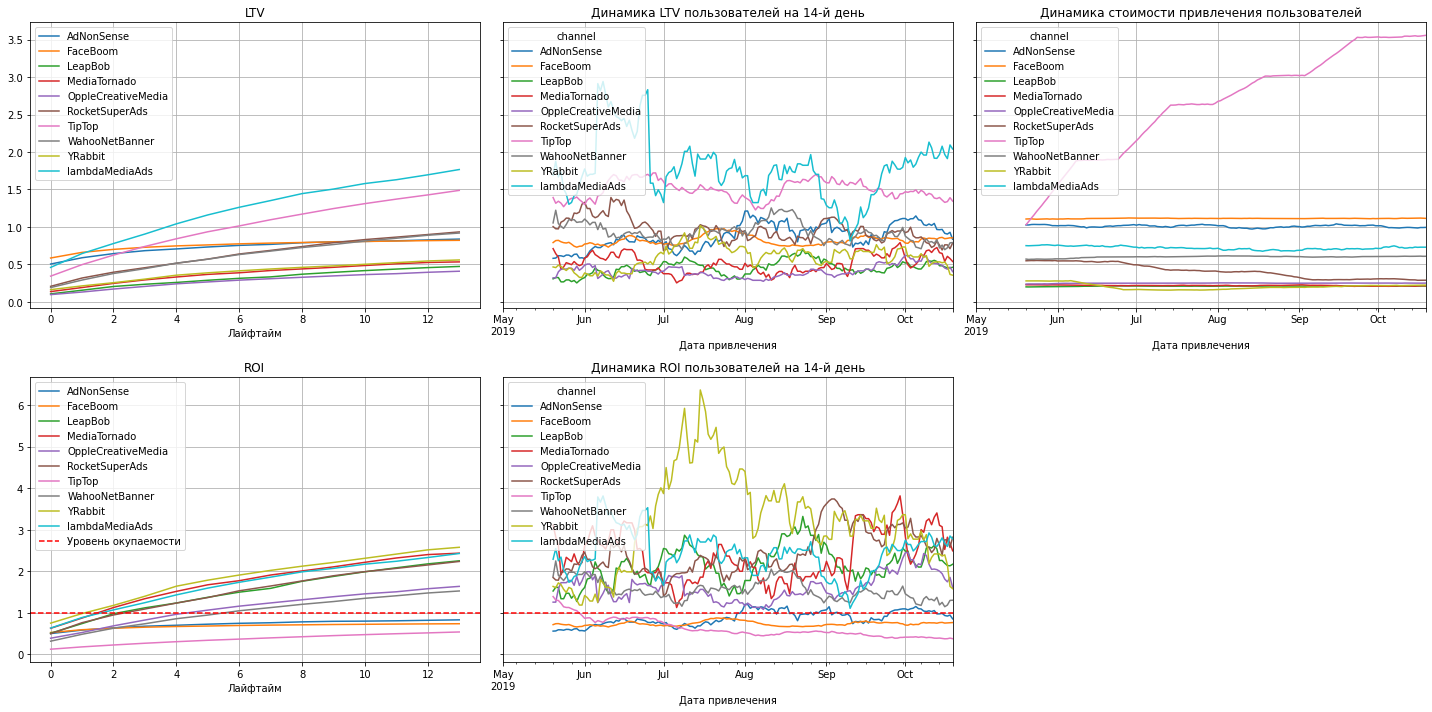

In [51]:
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20) 

In [52]:
# Посмотрим как каналы привличения зависят от региона
display(profiles.groupby('region').channel.value_counts().to_frame())

channel
region        channel                    
France        OppleCreativeMedia     2991
              LeapBob                2988
              WahooNetBanner         2971
              AdNonSense             1366
              lambdaMediaAds          742
Germany       WahooNetBanner         2579
              OppleCreativeMedia     2562
              LeapBob                2519
              AdNonSense             1219
              lambdaMediaAds          649
UK            OppleCreativeMedia     3052
              LeapBob                3046
              WahooNetBanner         3003
              AdNonSense             1295
              lambdaMediaAds          758
United States FaceBoom              29144
              TipTop                19561
              RocketSuperAds         4448
              MediaTornado           4364
              YRabbit                4312

In [53]:
# проверим в какие регионы входит указанный канал
profiles.query('channel == "WahooNetBanner"').region.unique()

array(['UK', 'France', 'Germany'], dtype=object)

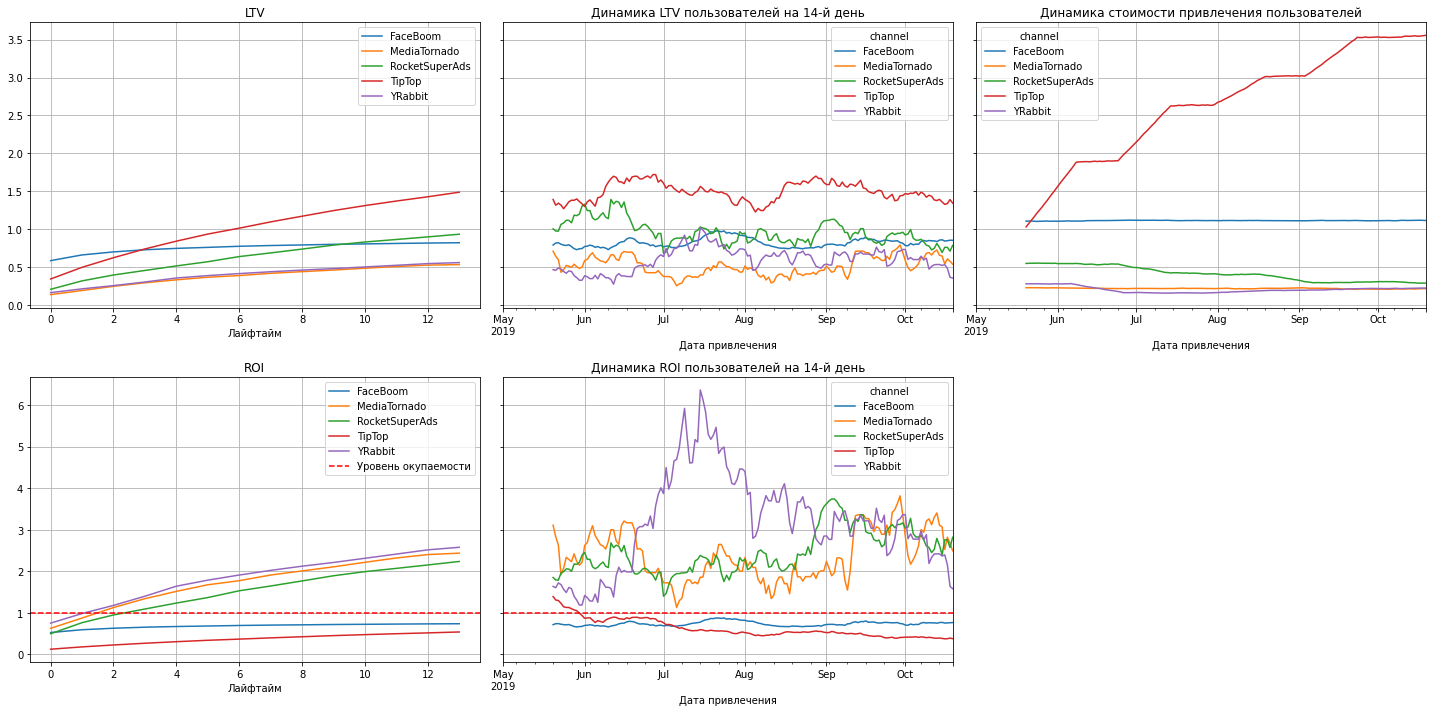

In [54]:
# Смотрим каналы привлечения по Американскому Региону
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20) 

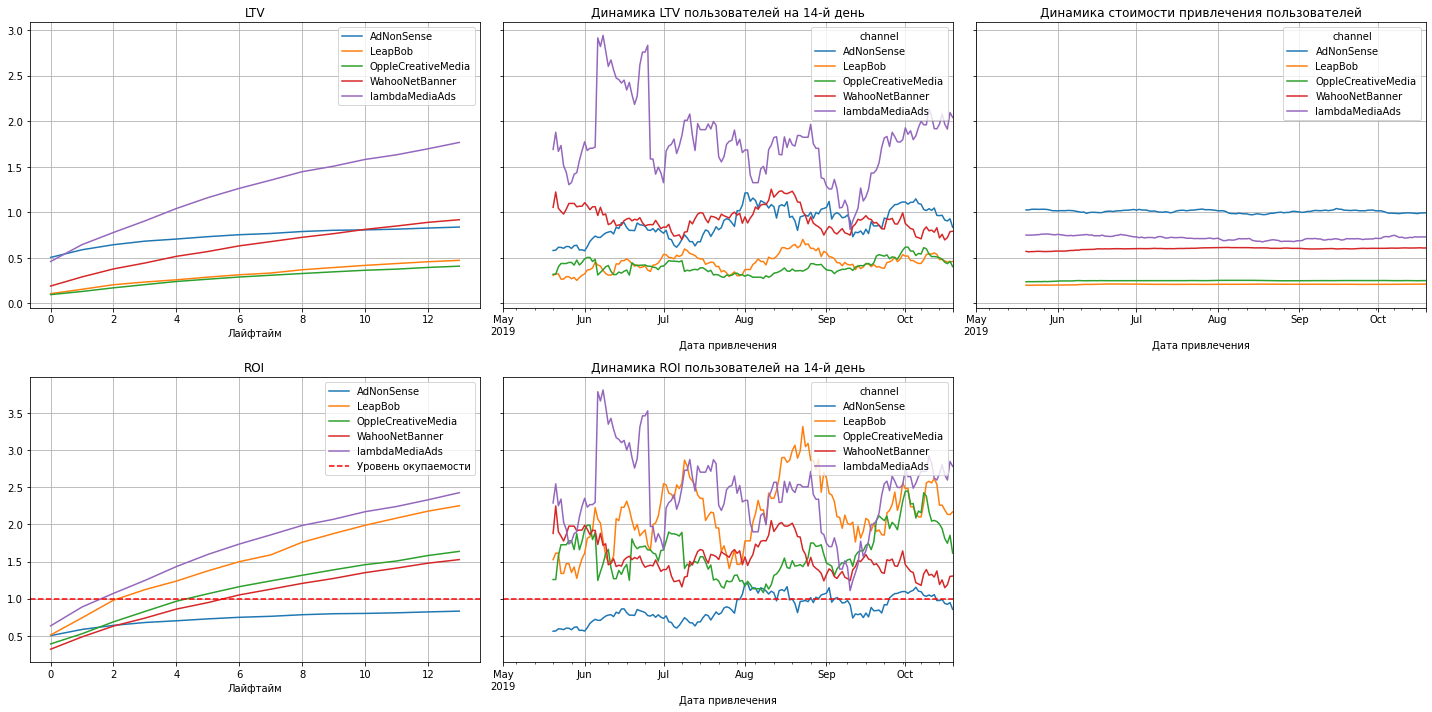

In [55]:
# Смотрим каналы привлечения по Европейкому Региону

dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20) 

**Окупаемость рекламы с разбивкой по рекламным каналам.**
- **ЛямбдаМедиаАДС** и **Tiptop** относительно остальных каналов привличения имеют выше LTV
- Динамика САС у **Tiptop** растет с каждым месяцем и достигла отметки 3.5, в то время как у остальных динамика нормальная без увеличения и находится на отметке 1.0 и ниже
- ROI у **TipTop**, **FaceBoom**, и **AdNonSense** не достигли уровня окупаемости. ниже всех ROI у **TipTop** из-за высокого роста динамики САС
- Хорошую ROI и его динамику(всплеск летом 2019г) показал канал привличения **YRabbit**. В июле ROI 14дня у этого канала пересек отметку в 600%. Либо этот канал сильнее остальных зависит от сезонности. Либо могут возникнуть либо как аномалия(ошибка в расчетах) или вследствии технической ошибки. (т.к в нашем датасете нет данных по event, этот вопрос останется не изученным). Тогда можно предположить что канал привличения **YRabbit** -  **маркетинговое чудо**

**Ответьте на такие вопросы:**
- **Окупается ли реклама, направленная на привлечение пользователей в целом?**
- **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- **Чем могут быть вызваны проблемы окупаемости?**

Окупается ли реклама, направленная на привлечение пользователей в целом?
- ROI  не достиг уровня окупаемости. Рекламная компания убыточная. ROI к 14 дню составил 80%. на каждый 1 доллар рекламных затрат возвращается только 0,8.
- По динамике ROI наблюдается спад от 1.4 до 0.6. К концу исследуемого периода компания потеряла около 80 % ROI от первоначального.
- Динамика CAC растет. САС вырос с 0,8 до 1.3 (Рост - хуже, падение - лучше)
- LTV  достаточно стабилен. держится в диапазоне от 0.8 до 0.1. Качество пользователей хорошее.

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Уровня окупаемости достиг только ROI у **PC**, **Android**, **MAC** и **iphone** нет
- ROI региона **USA** не достиг уровня окупаемости, из-за сильного роста САС в этом регионе 
- ROI у **TipTop**, **FaceBoom**, и **AdNonSense** не достигли уровня окупаемости. ниже всех ROI у **TipTop** из-за высокого роста динамики САС

Чем могут быть вызваны проблемы окупаемости?  
Проблемы окупаемости почти везде вызваны повышением расходов на рекламу(САС)  
А так же есть проблемы с удержанием пользователей в некоторых регионах и каналов приличения:
- Низкое удержание платящих пользователей из региона **USA** (но при этом самая высокая конверсия относительно других регионов) Возможно причиной низкого удержания может быть какая либо техническая проблема в приложении, либо какая то иная.
- Низкое удержание платящих пользователей у каналов привличения - **AdNonSense** и **Faceboom** (аналогично региону США, эти каналы привлечения так же имеют хорошую конверсию, но низкое удержание - что может указывать на наличие проблем)

### Выводы:

**Выделите причины неэффективности привлечения пользователей.**

Причинами неэффективности привлечения пользователей является:
- Рост расходов на рекламу, из за чего общий ROI падает 
- Плохая конверсия по некоторым регионам, устройствам и каналам привличения
- Низкое удержание платящих пользователей по некоторым регионам и каналам привличения

**Сформулируйте рекомендации для отдела маркетинга.**

Канал привличения **YRabbit** -  **маркетинговое чудо** (В июле динамика ROI 14дня у данного канала привличения пересек границу в 600%)

Для повышения общего ROI следует обратить внимания и проработать следующие проблемные места(разумеется по моему субъективному мнению):

Конверсия:
- Конверсия у пользователей с устройством **PC** чуть хуже остальных 

Удержание:
- Низкое удержание платящих пользователей из региона **USA** (но при этом самая высокая конверсия относительно других регионов) Возможно причиной низкого удержания может быть какая либо техническая проблема в приложении, либо какая то иная.
- Низкое удержание платящих пользователей у каналов привличения - **AdNonSense** и **Faceboom** (аналогично региону США, эти каналы привлечения так же имеют хорошую конверсию, но низкое удержание - что может указывать на наличие проблем)

Динамика САС (выше - хужеб ниже - лучше):
- Динамика САС у **Tiptop** растет с каждым месяцем и достигла отметки 3.5, в то время как у остальных динамика нормальная без увеличения и находится на отметке 1.0 и ниже
- Динамика САС **USA** стремительно выросла вверх начиная с июня перейдя черту в 1,0 в то время как САС остальных регионов весь временной отрезок находится около значений 0,4
- Больше всего рекламных расходов приходится на такие источники привличения как **TipTop** (54751.30 долларов) и **FaceBoom** (32445.60 долларов), что в свою очередь составляет около 80% от общей суммы всех расходов на рекламу.

ROI не достиг уровня окупаемости:
- ROI у **TipTop**, **FaceBoom**, и **AdNonSense** не достигли уровня окупаемости. ниже всех ROI у **TipTop** из-за высокого роста динамики САС
- ROI региона **USA** не достиг уровня окупаемости, и имеет тенденцию убывания. Динамика ROI остальных регионов выше уровня окупаемости.
- Уровня окупаемости достиг только ROI у **PC**, **Android**, **MAC** и **iphone** нет
- Общий ROI 14 дня — почти приблизился к 100%, т.е к уровню окупаемости.
- Наблюдается спад по динамике ROI пользователей на 14 день от 1.8 до 0.8. Динамика САС имеет тенденцию к росту. Если САС продолжит расти, велика вероятность не достичь уровня окупаемости и уйти в убыток по рекламе.


**В качестве рекомендаций можно выделить следующее:**  

Американский рынок крупный и привлекает больше всех покупателей но из за сильно выросших затрат на рекламу, его ROI упал ниже уровня окупаемости.Что делает его не рентабельным.Европейский рынок почти в два раза меньше Американского но показывает хороший уровень ROI. 

Оределим проблемные каналы и перспективные каналы в зависимости от Региона (USA and EU):

**Американский рынок**  
Каналы не достигшие уровня окупаемости (ROI < 100):
- Tiptop(+50% затрат от всех затрат на рекламу)
- Faceboom(+ низкое удержание платящих клиентов)  
Каналы с хорошим уровнем окупаемости:
- YRabbit (ROI в динамике переступил отметку в 600% а следовательно хороший потенциал для роста)
- MediaTornado и RocketSuperAds (ROI > 200%) 

**Европейский рынок**  
Каналы не достигшие уровня окупаемости (ROI < 100):
- AdNonSense(+ низкое удержание платящих клиентов)  
Каналы с хорошим уровнем окупаемости:
- LambdaMediaAds и LeapBob (ROI > 200%) 

Для повышения общего ROI можно порекомендовать перераспределить затраты на рекламу с убыточных каналов привличения на более перспективные которые показали хороший рост ROI, внутри каждого региона:  
- В Американском регионе отказаться от таких каналов привличения как Tiptop и Faceboom т.к на текущий момент они не окупаются, и добавить высвободившиеся средства на каналы YRabbit, MediaTornado и RocketSuperAds. Эти каналы имеют хороший ROI а так же имеют потенциал для роста.  
- В Европейском регионе можно посоветовать отказаться от  AdNonSense, а средства направить на LambdaMediaAds и LeapBob.